# <h1><center>Project</center></h1>

# <h2><center><span style='color:black'>  Machine Learning </span></center></h2>

# <h1><center><span style='color:blue'>   Analysis of Bi-Cycle Accidents </span></center></h1>

# <h2><center>Professor : Travis Millburn</center></h2>

# <p><h3><center>Malik Muhammad Khalil </center><h3></p>



# Summary:

                   Topic of my project is 'the Analysis of Bi-cycle Accidents', which include different kinds of reasons, important ones are: Age, Weather conditions, Time, Day, Month and Severity of Accident among all other causes which are included in the causes of accident happening. 
                   First of all I uploaded the datasets, after combination of datasets I do some Pre-processing on it, in order to clean it and make it ready for giving to the models for prediction.
                   After that, as because of many reasons or causes involve in accident happening that's why, I generate different quries and then from the main dataset I take some Features according to the Query and then from that features I make new datasets and then analyze the correlation between different features by using Heat maps, in order to check which feature have more influence on other that can cause accident.
                   Before Giving dataframe in the hand of model, I apply some scalar techniques to increase the predicition capability of models.
                   I use almost all the models, to check Accuracy of each model and then in the final report I just left with my 2 highest accurate models namely: Decision Tree Classifier and K-Nearest Neghbiour Classifier and their output is shown by Error Matrix, and also to further improve my results accuracy, I use Ensemble method called Super-Learner in which, I combine both these Classifiers in 1st Layer and in 2nd Layer Bagging Classifier is used, but the prediction accuracy remains same as it occurs in classifiers output.
                   

# Libraries

In [2]:
#Importing Libraries that will use in code
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Datasets

In [3]:
#Uploading Dataset having Bikers Details
bikers = pd.read_csv(r'C:\Users\khalil\ML Project\Bikers.csv')
bikers.head()

,Accident_Index,Gender,Severity,Age_Grp
0,197901A1SEE71,Male,Serious,36 to 45
1,197901A2JDW40,Male,Slight,46 to 55
2,197901A4IJV90,Male,Slight,46 to 55
3,197901A4NIE33,Male,Slight,36 to 45
4,197901A4SKO47,Male,Slight,46 to 55


In [4]:
#Uploading Dataset having Accidents details
accidents = pd.read_csv(r'C:\Users\khalil\ML Project\Accidents.csv')
accidents.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit


In [5]:
#Converting Datasets into Pandas DataFrames
bikers_df = pd.DataFrame(bikers)  
accidents_df = pd.DataFrame(accidents)

In [6]:
#Merging both DataFrames into 1, based on the Accident Index
df =pd.merge(bikers_df,accidents_df)
df.head()

,Accident_Index,Gender,Severity,Age_Grp,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,197901A1SEE71,Male,Serious,36 to 45,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
1,197901A2JDW40,Male,Slight,46 to 55,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
2,197901A4IJV90,Male,Slight,46 to 55,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
3,197901A4NIE33,Male,Slight,36 to 45,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
4,197901A4SKO47,Male,Slight,46 to 55,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit


# Pre-Processing on DataFrame

In [7]:
df = df .replace('Unknown','0 ', regex=True) #Rows having Unkonwn Entries converted into 0
del df['Accident_Index'] #Column Accident Index is Droped because No Need and its values are not able to use for processing
df.head()

,Gender,Severity,Age_Grp,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,Male,Serious,36 to 45,2,1,1979-01-01,18:20,50.0,Snow,0,Monday,Dual carriageway,Darkness lights lit
1,Male,Slight,46 to 55,1,1,1979-02-01,09:15,30.0,Snow,0,Tuesday,0,Daylight
2,Male,Slight,46 to 55,2,1,1979-04-01,08:45,30.0,Snow,0,Thursday,0,Daylight
3,Male,Slight,36 to 45,2,1,1979-04-01,13:40,30.0,Wet,0,Thursday,0,Daylight
4,Male,Slight,46 to 55,2,1,1979-04-01,18:50,30.0,Wet,0,Thursday,0,Darkness lights lit


In [8]:
df.info() #Getting information of dataframe Columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827861 entries, 0 to 827860
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                827861 non-null  object 
 1   Severity              827861 non-null  object 
 2   Age_Grp               827861 non-null  object 
 3   Number_of_Vehicles    827861 non-null  int64  
 4   Number_of_Casualties  827861 non-null  int64  
 5   Date                  827861 non-null  object 
 6   Time                  827861 non-null  object 
 7   Speed_limit           827861 non-null  float64
 8   Road_conditions       827861 non-null  object 
 9   Weather_conditions    827861 non-null  object 
 10  Day                   827861 non-null  object 
 11  Road_type             827861 non-null  object 
 12  Light_conditions      827861 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 88.4+ MB


In [9]:
df.dtypes #Same as above for confirmation about the types of columns of dataframe

Gender                   object
Severity                 object
Age_Grp                  object
Number_of_Vehicles        int64
Number_of_Casualties      int64
Date                     object
Time                     object
Speed_limit             float64
Road_conditions          object
Weather_conditions       object
Day                      object
Road_type                object
Light_conditions         object
dtype: object

In [10]:
#I select Label Encoder as a pre-processing tool to work on dataframe values to convert their types and values into Integer 
#form so that it become easy for processing than as a string entries
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [11]:
df.dtypes  #Know data-types are changed and its easy to further process the dataframe

Gender                    int32
Severity                  int32
Age_Grp                   int32
Number_of_Vehicles        int64
Number_of_Casualties      int64
Date                      int32
Time                      int32
Speed_limit             float64
Road_conditions           int32
Weather_conditions        int32
Day                       int32
Road_type                 int32
Light_conditions          int32
dtype: object

In [12]:
#Finalized Data Frame, ready to implement models and check prediction
df.head()

,Gender,Severity,Age_Grp,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,1,1,4,2,1,0,1098,50.0,4,0,1,1,0
1,1,2,5,1,1,31,553,30.0,4,0,5,0,2
2,1,2,5,2,1,90,523,30.0,4,0,4,0,2
3,1,2,4,2,1,90,818,30.0,5,0,4,0,2
4,1,2,5,2,1,90,1128,30.0,5,0,4,0,0


# Query 1: Relationsip between hour, day, week, month with number of fatal accident

In [13]:
#creating function to add month column
import datetime
df['Month'] = pd.DatetimeIndex(df['Date']).month


In [14]:
#creating function to add hour column
df['Hour'] = pd.DatetimeIndex(df['Time']).month

In [20]:
#getting a dataframe as per query
q1_df=pd.DataFrame(data=df,columns=['Hour','Day','Month','Severity'])
q1_df.head()

,Hour,Day,Month,Severity
0,1,1,1,1
1,1,5,1,2
2,1,4,1,2
3,1,4,1,2
4,1,4,1,2


<AxesSubplot:>

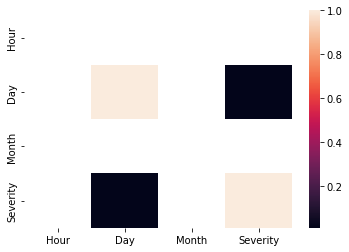

In [22]:
#I highly prefer PLOTLY but my system not support it because it require to much processing and my system able to  process it but 
#not display.
#So, I use Heat Maps to plot the results
sns.heatmap(q1_df.corr())

# Query 2: Affect of Age on the number of accidents:

In [16]:
#DataFrame according to 2nd query
q2_df=  pd.DataFrame(data=df, columns=[ 'Gender', 'Age_Grp','Severity'])

In [17]:
#Only males accidents but any kind of Severity
q2_df=q2_df[q2_df.Gender ==1]
q2_df.head()

,Gender,Age_Grp,Severity
0,1,4,1
1,1,5,2
2,1,5,2
3,1,4,2
4,1,5,2


<AxesSubplot:>

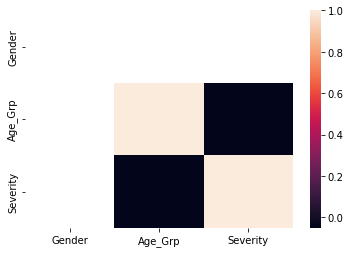

In [18]:
#Plot to show Correlation between Query 2 dataframe
sns.heatmap(q2_df.corr())

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age vs Severity')

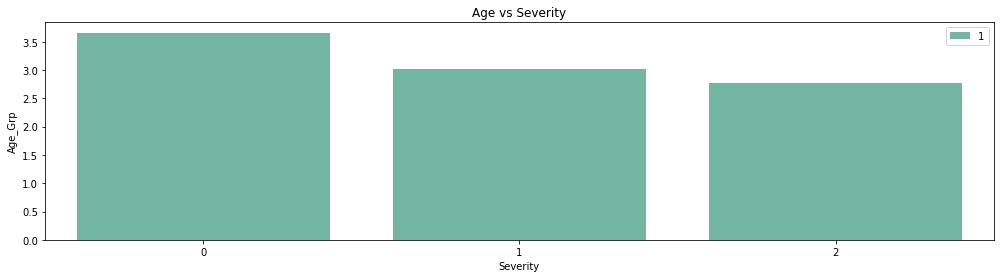

In [19]:
#Histogram
plt.figure(figsize=(17,4))
sns.barplot('Severity','Age_Grp',hue='Gender',data=q2_df,ci=None, palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Age vs Severity')

<div class="alert alert-block alert-danger">
<b>

It is seen that the Drivers who met with an accident were in the age range of 30-40 years.
Usually, drivers who meet with an accident are males.
</div>

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Severity', ylabel='Age_Grp'>

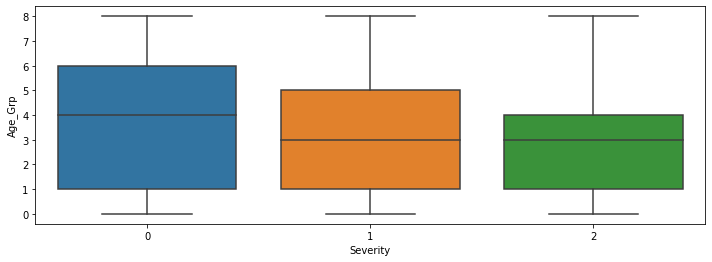

In [20]:
#Just checking the Distribution on an entire Dataframe
plt.figure(figsize=(12,4))
sns.boxplot('Severity','Age_Grp',data=q2_df)

# Query 3: How the weather impact the number or severity of an accident?

In [21]:
#Dataframe according to Query requirement 
q3_df=pd.DataFrame(data=df,columns=['Severity','Light_conditions','Weather_conditions'])

In [22]:
#For all kind of Weather Condition, listed below
q3_df=q3_df[q3_df.Weather_conditions!=-1]

<AxesSubplot:>

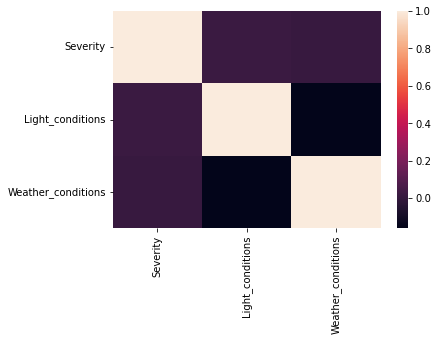

In [23]:
#Correlation in dataframe related to query 3
sns.heatmap(q3_df.corr())

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Weather vs Light/Time Condition')

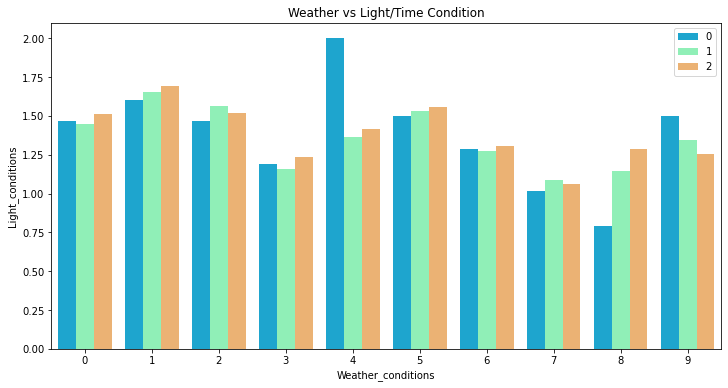

In [24]:
plt.figure(figsize=(12,6))
sns.barplot('Weather_conditions','Light_conditions',data=q3_df, hue='Severity',ci=None, palette='rainbow')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Weather vs Light/Time Condition')

<div class="alert alert-block alert-warning">
<b>

Accidents usually take place in the afternoon:
Accidents with Slight severity occured the most,
Accidents ususally took place when the Weather conditions were fine and also there were'nt any high winds : meaning which the weather conditions didn't effectively contribute to occurences of accidents.
    
</div>

<div class="alert alert-block alert-info">
<b>


Weather Conditions:

1. Fine no high winds
2. Raining no high winds
3. Snowing no high winds
4. Fine + high winds
5. Raining + high winds
6. Snowing + high winds
7. Fog or mist
8. Other
9. Unknown
    
</div>

<AxesSubplot:xlabel='Severity', ylabel='count'>

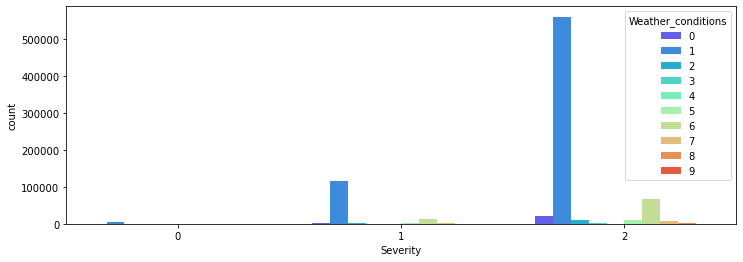

In [25]:
#Number of Accident Severities related to each weather condition 
plt.figure(figsize=(12,4))
sns.countplot(x='Severity',data=q3_df,hue='Weather_conditions',palette='rainbow')

<div class="alert alert-block alert-danger">
<b>

For both Histograms above and this one, Accident Severities are:
Fatal (0),
Serious (1),
Slight   (2).
</div>

In [26]:
#Total Number of Accidents for each of 3 kinds
df.Severity.value_counts()

2    681568
1    139563
0      6730
Name: Severity, dtype: int64

# Fore-Casting Fatal Accidents

Fatal Accidents means Accident Severity should be 1 or max upto 2, So: 

In [27]:
#Creating a Dataframe according to Need
fatal_df=pd.DataFrame(data=df,columns=['Gender','Age_Grp','Time','Severity'])

Severity = 1 corresponds to fatal accident and Gender = 1 corresponds to male driver

In [28]:
#We select only Males Accidents or Driver Cases and any kind of Severity
fatal_df=fatal_df[(fatal_df.Gender!=-1)  & (fatal_df.Severity!=-1)]
fatal_df.head()

,Gender,Age_Grp,Time,Severity
0,1,4,1098,1
1,1,5,553,2
2,1,5,523,2
3,1,4,818,2
4,1,5,1128,2


# Prediction

In [29]:
#Splitting the Dataframe inti Train and Test
from sklearn.model_selection import train_test_split

In [30]:
#Assigining Response Variable, in this case Severity
X=fatal_df.drop('Severity',axis=1)
y=fatal_df['Severity']

In [31]:
#Robust-Scaler a pre-Processing Technique to increase Accuracy
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [32]:
#Now Parse the dataframe into Test and Train sets
x_df_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_df_scaled, y)

# Implementation of Different Models For Prediction

In [33]:
#1st Model: Decision Tree Classifier (DTC)
from sklearn.tree import DecisionTreeClassifier #Importing DTC from Library
DTC= DecisionTreeClassifier() 
DTC.fit(x_train,y_train) #Fitting Test and Train sets on DTC

DecisionTreeClassifier()

In [34]:
predictions= DTC.predict(x_test) #Predicting DTC on Test set

In [35]:
#Error Matrix to analyze the Performance of our model that is: DTC
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.03      0.00      0.01      1677
           1       0.25      0.02      0.03     34938
           2       0.82      0.99      0.90    170351

    accuracy                           0.82    206966
   macro avg       0.37      0.34      0.31    206966
weighted avg       0.72      0.82      0.75    206966



<div class="alert alert-block alert-success">
<b>

Matrix shows that the Model Prediction is 82% for Severity 2 (that means model is 82 times predict correctly out of 100), and Similarly for severity value 1 model accuracy is 25% and 3% for Severity 1. 

</div>

In [37]:
#2nd Model: KNN Model
from sklearn.neighbors import KNeighborsClassifier #Importing the Model from Library
KNC = KNeighborsClassifier(n_neighbors=25) #82% Accuracy starts from 15 Number of Neighbors and Decrease after 25 Neighbours
KNC.fit(x_train, y_train) #Fitting
KNC.predict(x_test) #Predicting the Model
print('Accuracy: {:.2f}'.format(KNC.score(x_test, y_test))) #Accuracy Score of Model on Test Sets

Accuracy: 0.82


In [38]:
#3rd Model: Ensemble Technique in which I select my 2 best accurate Models, so to check accuracy is increased or not
from mlens.ensemble import SuperLearner  #Super learner is a technique to join more than 1 models
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn.metrics import accuracy_score

[MLENS] backend: threading


In [39]:
#Super Learner Technique is used for Ensembing Method
ensemble = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)

In [40]:
#K-Nearest-Neighbour and Decision-Tree-Classifiers are my most best accurate Models, So i combine them here
#First Layer
ensemble.add([KNC, DTC])

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...895ADC0>)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x0000021D2895ADC0>,
       shuffle=False, verbose=2)

In [42]:
#Final or 2nd Layer
from sklearn.ensemble import BaggingClassifier
ensemble.add_meta(BaggingClassifier())

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...895ADC0>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x0000021D2895ADC0>,
       shuffle=False, verbose=2)

In [43]:
#Fitting
ensemble.fit(x_train, y_train)


Fitting 2 layers
Processing layer-1             done | 00:05:16
Processing layer-2             done | 00:00:01
Fit complete                        | 00:05:18


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...895ADC0>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x0000021D2895ADC0>,
       shuffle=False, verbose=2)

In [44]:
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble.predict(x_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble.predict(x_test), y_test))


Predicting 2 layers
Processing layer-1             done | 00:01:40
Processing layer-2             done | 00:00:00
Predict complete                    | 00:01:41
Accuracy - Train :  0.8233549956111742

Predicting 2 layers
Processing layer-1             done | 00:00:32
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:32
Accuracy - Test :  0.8230868838359924


In [45]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                                   score-m  score-s    ft-m  ft-s   pt-m   pt-s
layer-1  decisiontreeclassifier       0.81     0.00  226.63  0.04   0.15   0.01
layer-1  kneighborsclassifier         0.82     0.00   38.47  4.33  57.24  10.28



In [ ]:
# summary at the top r begining  of this file, make it ready for submission 
#Make slides put theory whay where u select project and what methods u apply what are the results and output pictures

# Conclusion

As above we Analyze:
1. Bi-cycle Accidents of Males only.
2. Specific Age-Group in which most of the Accidents occured.
3. Weather or Light Conditions that can cause bi-cycle Accidents on Road.
4. Now finally our Target was to check or to Predict the Severity of an Accident by using above all 3 Variables, ehich means       whether the Accident is Fatal, Serious or Slight.
    In the Last Ensemble Method, in which I combine 2 Models Decision Tree Classifier and K-Nearest Neighbour Classifer we get 
    the maximum Accuracy of 82% by using 'Severity' as a Response Variable, which means that out of 100 times our Model Predict     82 times Accuratley the Severity of Bi-Cycle Accidents.